<a href="https://colab.research.google.com/github/DG-AOG/Car_Insurance_Claim_Analysis/blob/main/ML_Assessment_AOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_csv("/content/Car_Insurance_Claim.csv")

In [ ]:
# Displaying the first few rows of the dataset
display(df.head())

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [ ]:
# Displaying the data types of each column
print(df.dtypes)

ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object


In [ ]:
# Checking for missing values in the dataset
print(df.isnull().sum().sort_values(ascending=False))

CREDIT_SCORE           982
ANNUAL_MILEAGE         957
ID                       0
GENDER                   0
AGE                      0
EDUCATION                0
RACE                     0
INCOME                   0
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
DRIVING_EXPERIENCE       0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64


In [ ]:
# Impute missing values in 'CREDIT_SCORE' and 'ANNUAL_MILEAGE' with the mean
df['CREDIT_SCORE'].fillna(df['CREDIT_SCORE'].mean(), inplace=True)
df['ANNUAL_MILEAGE'].fillna(df['ANNUAL_MILEAGE'].mean(), inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum().sort_values(ascending=False))

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64


/tmp/ipython-input-656482103.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_SCORE'].fillna(df['CREDIT_SCORE'].mean(), inplace=True)
/tmp/ipython-input-656482103.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
# Numeric summary
num_cols = ['CREDIT_SCORE','ANNUAL_MILEAGE','SPEEDING_VIOLATIONS','DUIS','PAST_ACCIDENTS']
display(df[num_cols].describe())

# Categorical counts
cat_cols = ['AGE','GENDER','RACE','DRIVING_EXPERIENCE','EDUCATION','INCOME','VEHICLE_OWNERSHIP','VEHICLE_YEAR','MARRIED','CHILDREN','POSTAL_CODE','VEHICLE_TYPE','OUTCOME']
for c in cat_cols:
    print(c, df[c].value_counts(dropna=False).to_dict())

,CREDIT_SCORE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,0.515813,11697.003207,1.482900,0.23920,1.056300
std,0.130752,2680.167384,2.241966,0.55499,1.652454
min,0.053358,2000.000000,0.000000,0.00000,0.000000
25%,0.431509,10000.000000,0.000000,0.00000,0.000000
50%,0.515813,11697.003207,0.000000,0.00000,0.000000
75%,0.607607,13000.000000,2.000000,0.00000,2.000000
max,0.960819,22000.000000,22.000000,6.00000,15.000000


AGE {'26-39': 3063, '40-64': 2931, '16-25': 2016, '65+': 1990}
GENDER {'female': 5010, 'male': 4990}
RACE {'majority': 9012, 'minority': 988}
DRIVING_EXPERIENCE {'0-9y': 3530, '10-19y': 3299, '20-29y': 2119, '30y+': 1052}
EDUCATION {'high school': 4157, 'university': 3928, 'none': 1915}
INCOME {'upper class': 4336, 'middle class': 2138, 'poverty': 1814, 'working class': 1712}
VEHICLE_OWNERSHIP {1.0: 6970, 0.0: 3030}
VEHICLE_YEAR {'before 2015': 6967, 'after 2015': 3033}
MARRIED {0.0: 5018, 1.0: 4982}
CHILDREN {1.0: 6888, 0.0: 3112}
POSTAL_CODE {10238: 6940, 32765: 2456, 92101: 484, 21217: 120}
VEHICLE_TYPE {'sedan': 9523, 'sports car': 477}
OUTCOME {0.0: 6867, 1.0: 3133}


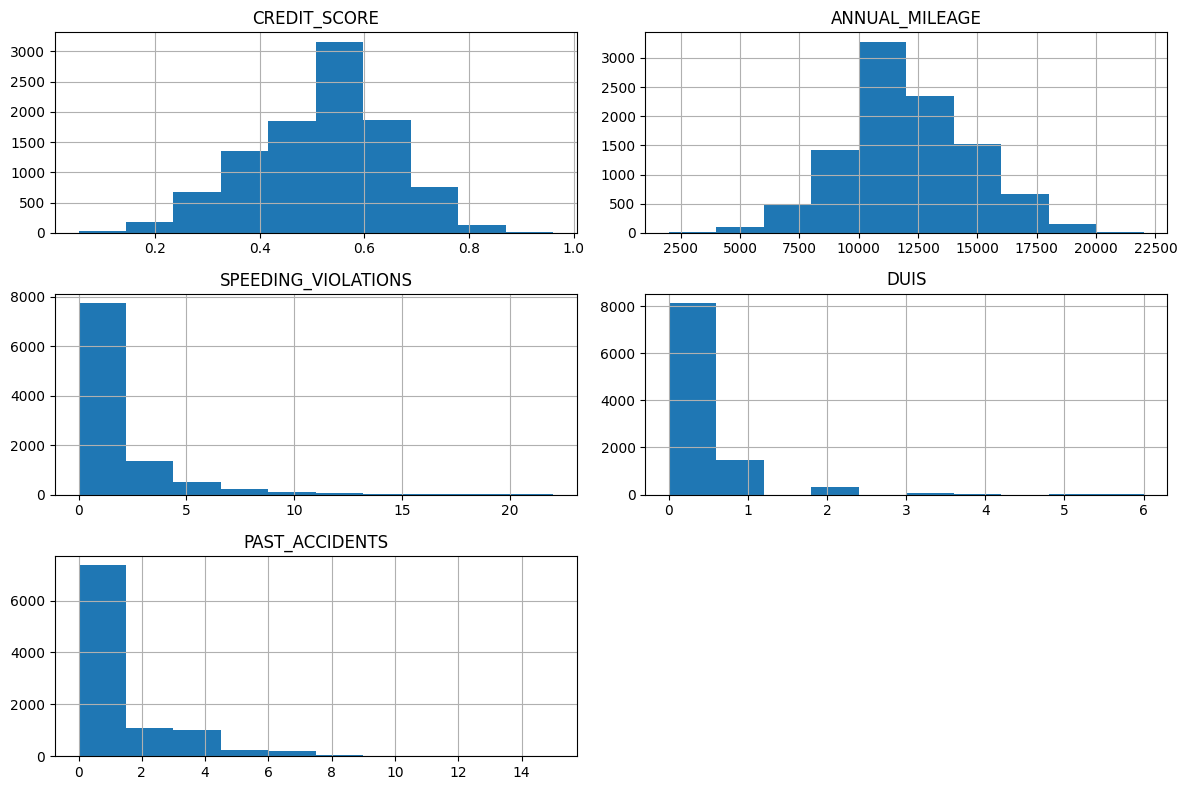

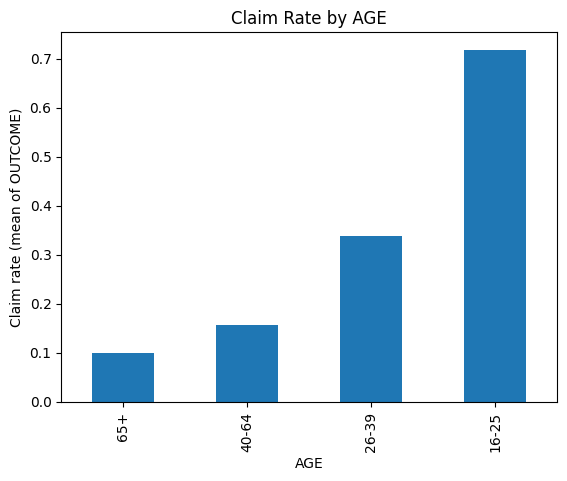

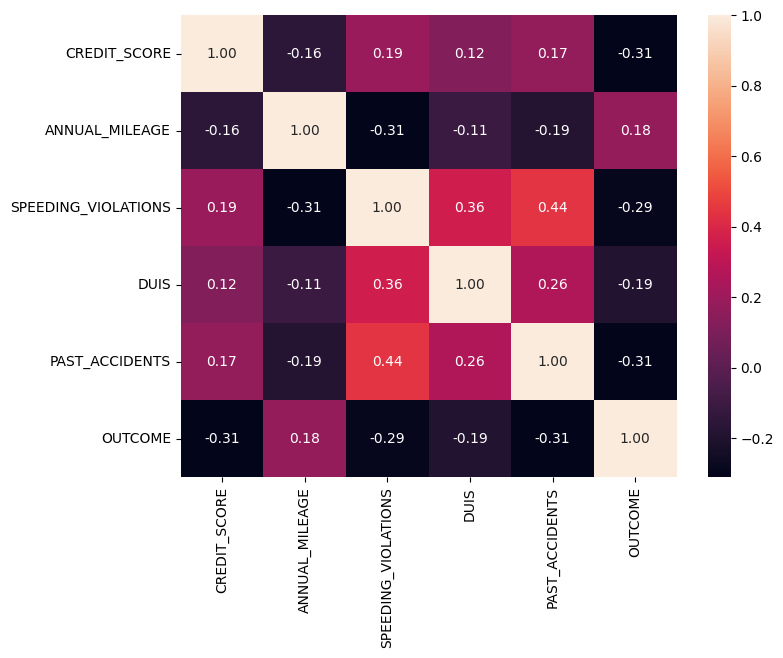

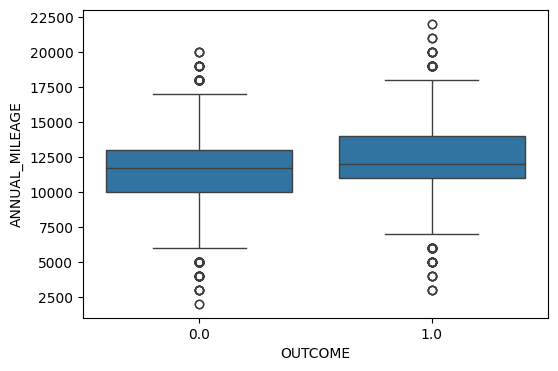

In [ ]:
# Histogram of numeric features
df[num_cols].hist(figsize=(12,8))
plt.tight_layout()
plt.show()

# Bar chart: AGE vs OUTCOME rate
age_out = df.groupby('AGE')['OUTCOME'].mean().sort_values()
age_out.plot(kind='bar', title='Claim Rate by AGE')
plt.ylabel('Claim rate (mean of OUTCOME)')
plt.show()

# Correlation heatmap (numeric)
corr = df[num_cols + ['OUTCOME']].corr()
plt.figure(figsize=(8,6)); sns.heatmap(corr, annot=True, fmt=".2f"); plt.show()

# Boxplot: ANNUAL_MILEAGE vs OUTCOME
plt.figure(figsize=(6,4))
sns.boxplot(x='OUTCOME', y='ANNUAL_MILEAGE', data=df)
plt.show()

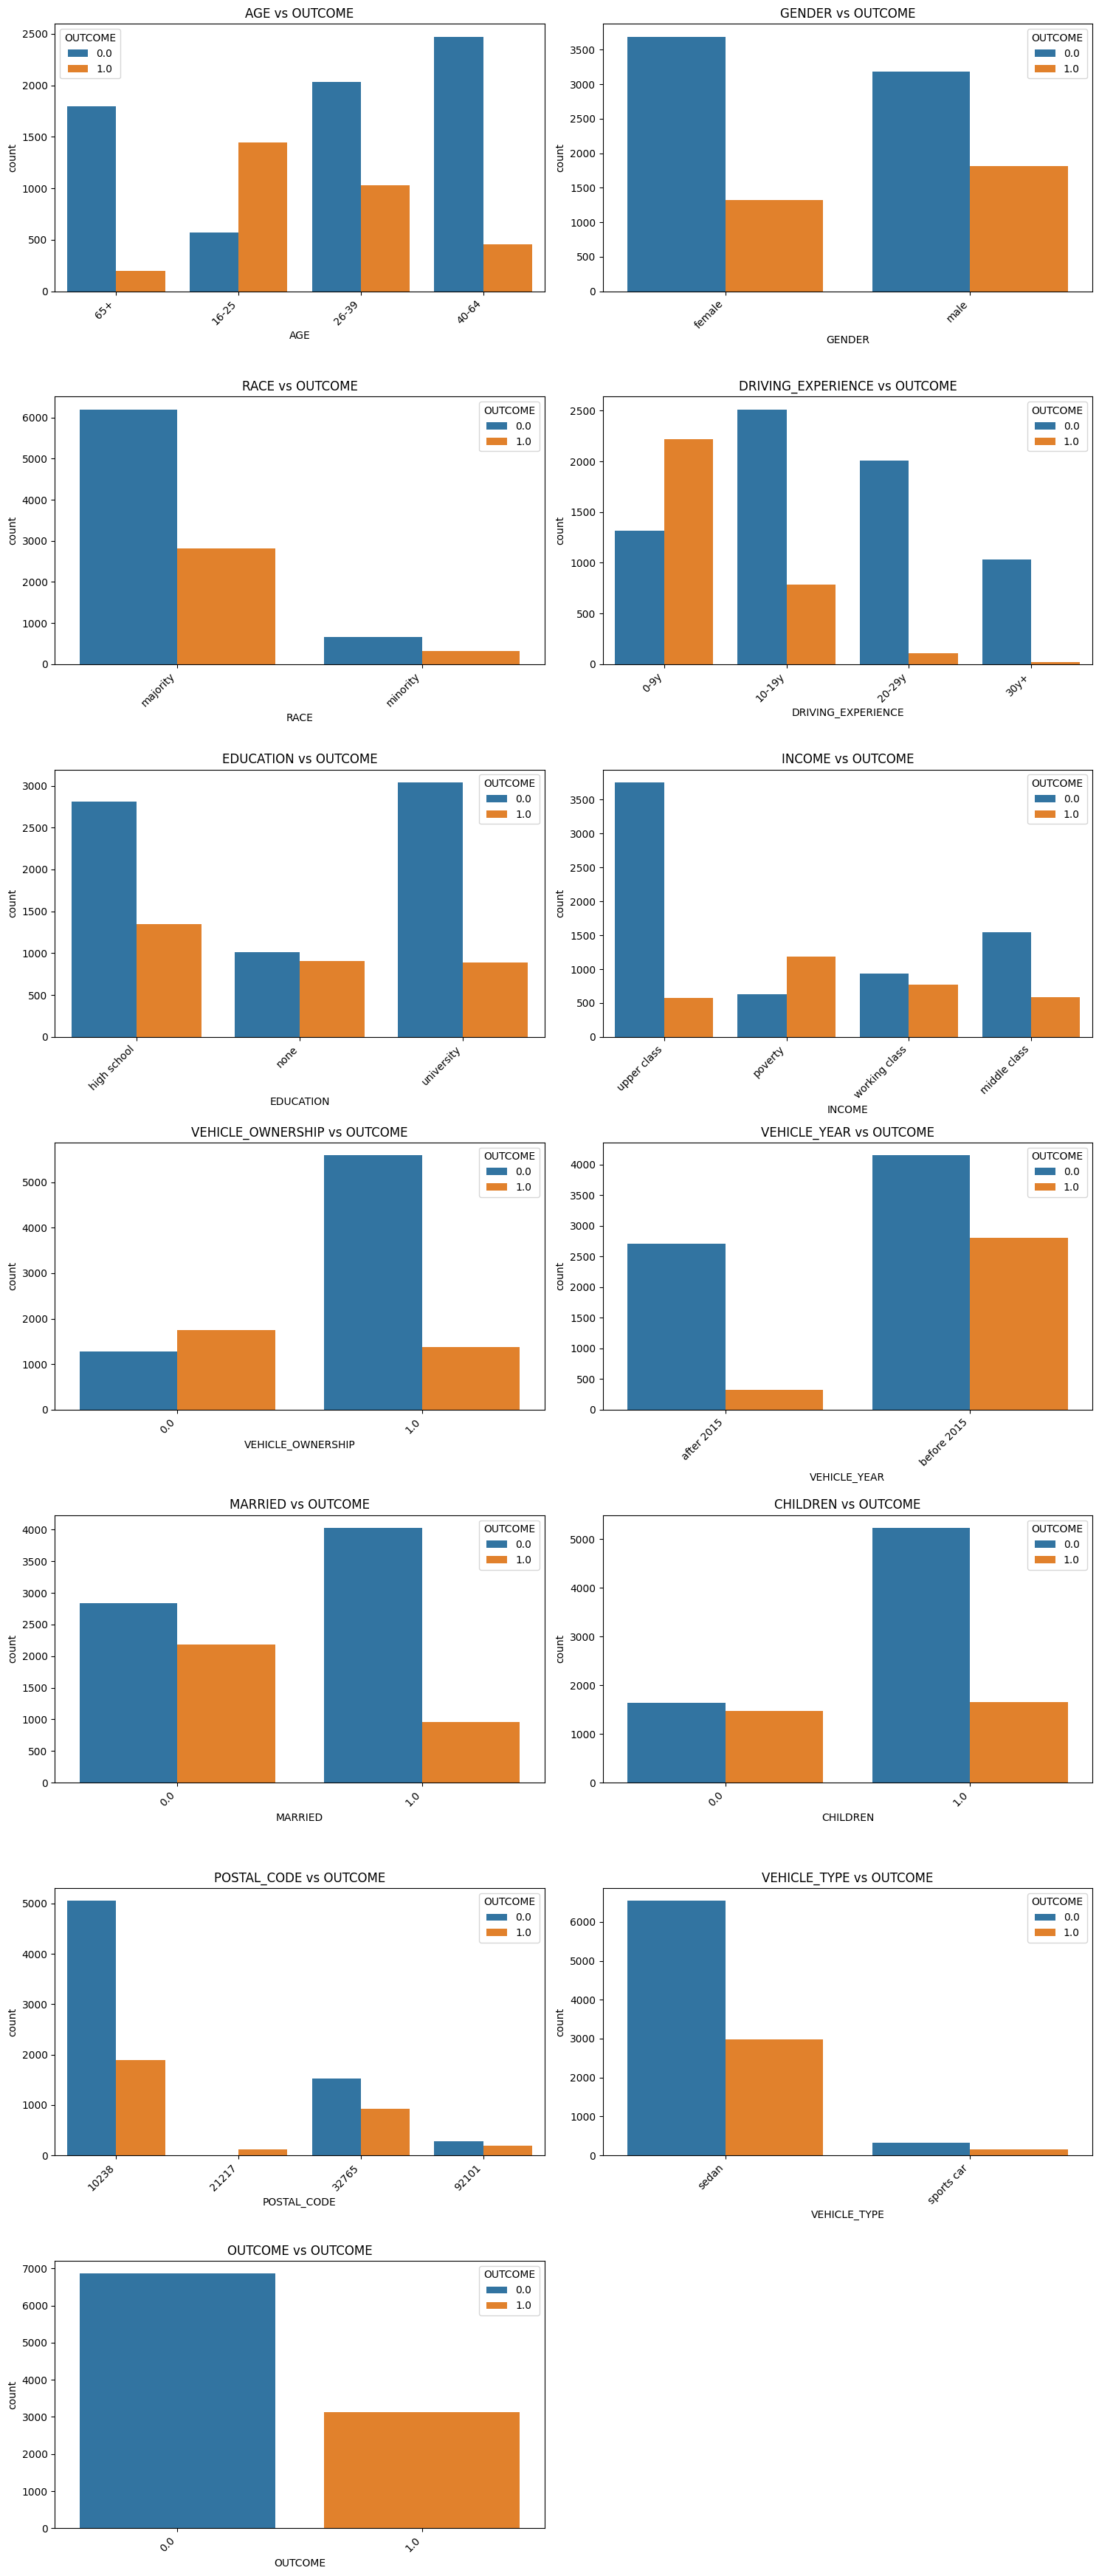

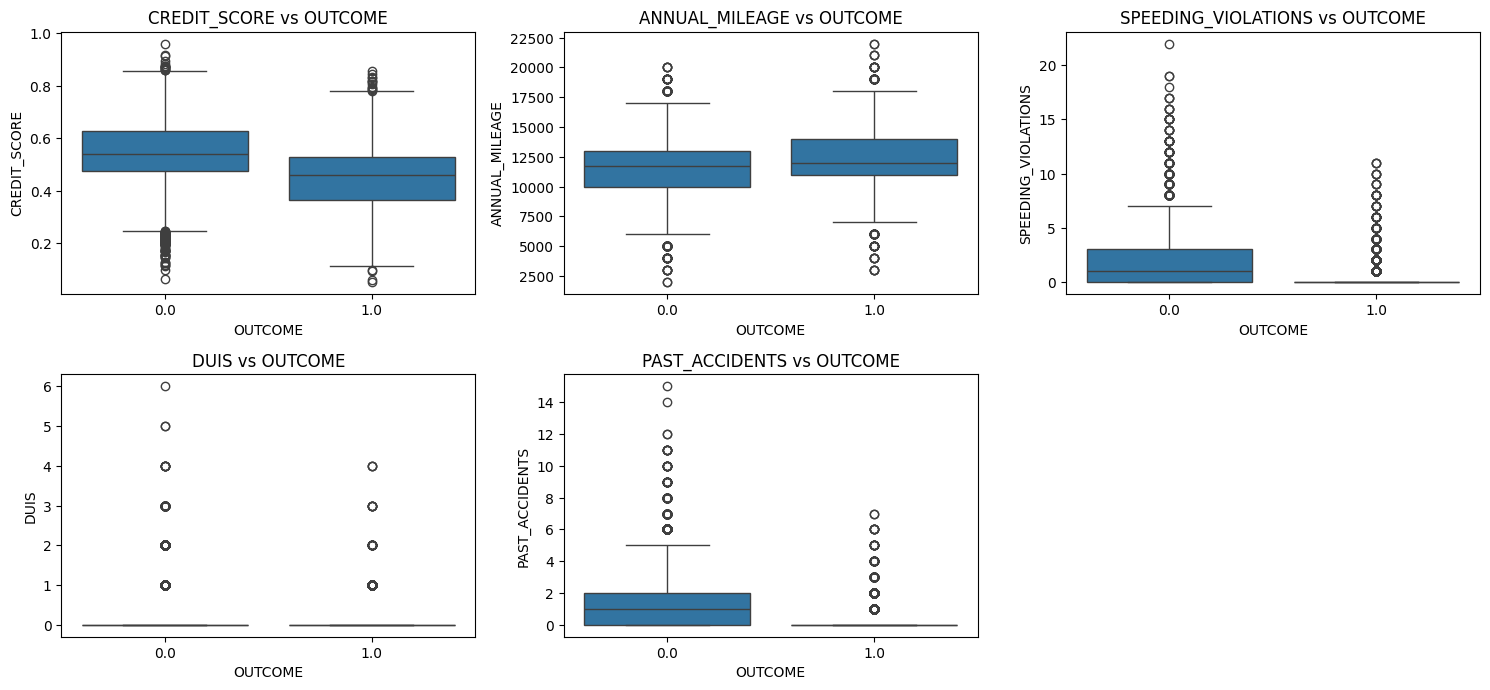

In [ ]:
# Analyze the relationship between categorical features and the target variable 'OUTCOME'
import math
n_cat = len(cat_cols)
rows = math.ceil(n_cat / 2)  # 2 columns per row
plt.figure(figsize=(15, rows * 5))
for i, col in enumerate(cat_cols):
    plt.subplot(rows, 2, i + 1)
    sns.countplot(x=col, hue='OUTCOME', data=df)
    plt.title(f'{col} vs OUTCOME')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyze the relationship between numerical features and the target variable 'OUTCOME'
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='OUTCOME', y=col, data=df)
    plt.title(f'{col} vs OUTCOME')
plt.tight_layout()
plt.show()

In [ ]:
display(df.head())

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [ ]:
# Apply one-hot encoding
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

display(df.head())

,ID,CREDIT_SCORE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,AGE_26-39,AGE_40-64,AGE_65+,GENDER_male,...,INCOME_working class,VEHICLE_OWNERSHIP_1.0,VEHICLE_YEAR_before 2015,MARRIED_1.0,CHILDREN_1.0,POSTAL_CODE_21217,POSTAL_CODE_32765,POSTAL_CODE_92101,VEHICLE_TYPE_sports car,OUTCOME_1.0
0,569520,0.629027,12000.0,0,0,0,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
1,750365,0.357757,16000.0,0,0,0,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
2,199901,0.493146,11000.0,0,0,0,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
3,478866,0.206013,11000.0,0,0,0,False,False,False,True,...,True,True,True,False,True,False,True,False,False,False
4,731664,0.388366,12000.0,2,0,1,True,False,False,True,...,True,True,True,False,False,False,True,False,False,True


In [ ]:
# Define features (X) and target (y)
X = df.drop(['ID', 'OUTCOME_1.0'], axis=1)
y = df['OUTCOME_1.0']

# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set (X_train):", X_train.shape)
print("Testing set (X_test):", X_test.shape)
print("Training set (y_train):", y_train.shape)
print("Testing set (y_test):", y_test.shape)

Training set (X_train): (8000, 26)
Testing set (X_test): (2000, 26)
Training set (y_train): (8000,)
Testing set (y_test): (2000,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the models
logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Train the models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

print("Logistic Regression model trained.")
print("Random Forest model trained.")
print("Gradient Boosting model trained.")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression model trained.
Random Forest model trained.
Gradient Boosting model trained.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    "Logistic Regression": logreg,
    "Random Forest": rf,
    "Gradient Boosting": gb
}

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC-AUC": roc_auc
    }

for name, metrics in results.items():
    print(f"--- {name} ---")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("-" * (len(name) + 6))

--- Logistic Regression ---
Accuracy: 0.8295
Precision: 0.7483
Recall: 0.6874
F1-score: 0.7165
ROC-AUC: 0.8868
-------------------------
--- Random Forest ---
Accuracy: 0.8260
Precision: 0.7291
Recall: 0.7081
F1-score: 0.7184
ROC-AUC: 0.8890
-------------------
--- Gradient Boosting ---
Accuracy: 0.8430
Precision: 0.7472
Recall: 0.7544
F1-score: 0.7508
ROC-AUC: 0.9114
-----------------------


Model Evaluation Results:


,Accuracy,Precision,Recall,F1-score,ROC-AUC
Logistic Regression,0.8295,0.748264,0.687400,0.716542,0.886823
Random Forest,0.8260,0.729064,0.708134,0.718447,0.889008
Gradient Boosting,0.8430,0.747235,0.754386,0.750794,0.911394


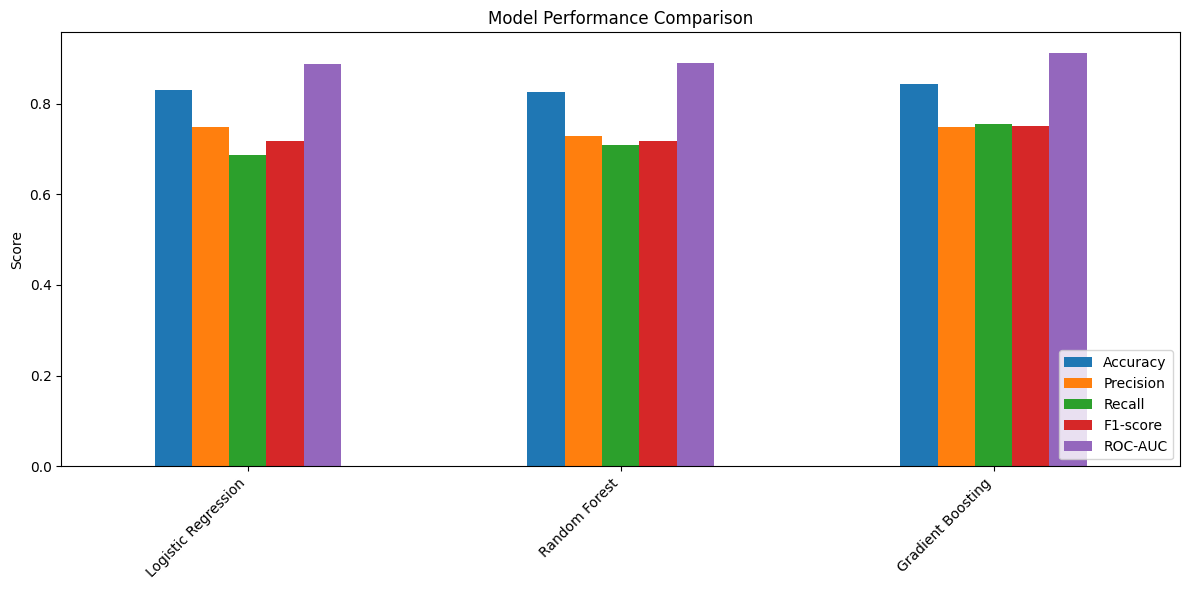

In [ ]:
# Convert results dictionary to a pandas DataFrame for easier plotting
results_df = pd.DataFrame(results).T
print("Model Evaluation Results:")
display(results_df)

# Visualize the results
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

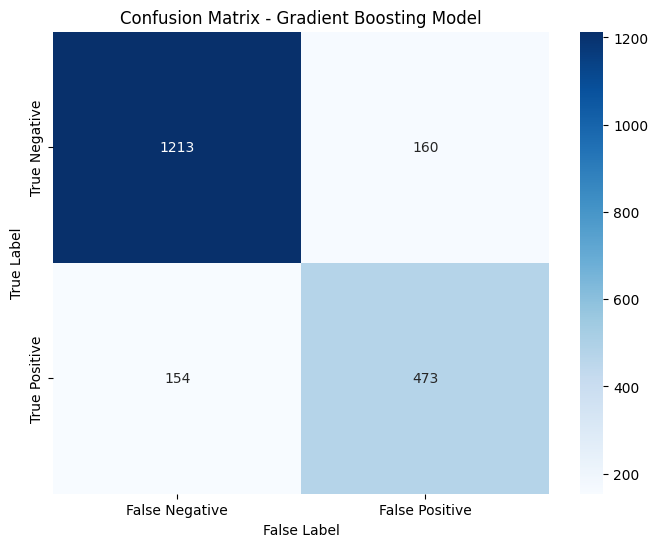

True Negative Rate (Specificity): 0.8835


In [ ]:
# Visualize the confusion matrix for the Gradient Boosting model
y_pred_gb = gb.predict(X_test)
cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['False Negative', 'False Positive'], yticklabels=['True Negative', 'True Positive'])
plt.xlabel('False Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Gradient Boosting Model')
plt.show()

# Extract TN, FP, FN, TP
tn, fp, fn, tp = cm_gb.ravel()

# Calculate True Negative Rate (Specificity)
tnr = tn / (tn + fp)

# Print the True Negative Rate
print(f"True Negative Rate (Specificity): {tnr:.4f}")

## Summary of Car Insurance Claim Prediction Analysis

Objective: Predict whether a driver will file a claim (OUTCOME).

**Key Findings from Exploratory Data Analysis:**

*   Missing values were present in the `CREDIT_SCORE` and `ANNUAL_MILEAGE` columns, which were imputed with the mean.
*   Several categorical features showed a notable relationship with the `OUTCOME`, such as `AGE` (younger drivers having a higher claim rate) and `DRIVING_EXPERIENCE`.
*   Among numerical features, `SPEEDING_VIOLATIONS`, `DUIS`, and `PAST_ACCIDENTS` showed positive correlations with the `OUTCOME`, as expected. `CREDIT_SCORE` had a negative correlation.

**Model Performance:**

Three classification models were trained and evaluated: Logistic Regression, Random Forest, and Gradient Boosting. The models were evaluated using Accuracy, Precision, Recall, F1-score, and ROC-AUC.

| Model               | Accuracy | Precision | Recall | F1-score | ROC-AUC |
| :------------------ | :------- | :-------- | :----- | :------- | :------ |
| Logistic Regression | 0.8295   | 0.7483    | 0.6874 | 0.7165   | 0.8868  |
| Random Forest       | 0.8260   | 0.7291    | 0.7081 | 0.7184   | 0.8890  |
| Gradient Boosting   | **0.8430** | 0.7472    | **0.7544** | **0.7508** | **0.9114** |

Based on the evaluation metrics, the **Gradient Boosting** model performed the best overall, achieving the highest Accuracy, Recall, F1-score, and ROC-AUC.

**Feature Importance:**

Analysis of feature importance from the tree-based models and coefficients from Logistic Regression revealed that features like `VEHICLE_OWNERSHIP`, `SPEEDING_VIOLATIONS`, `DRIVING_EXPERIENCE`, `VEHICLE_YEAR`, and `PAST_ACCIDENTS` were among the most influential in predicting the `OUTCOME`.

**Confusion Matrix Analysis:**

The confusion matrix for the Gradient Boosting model provided a detailed breakdown of correct and incorrect predictions. It showed that the model was effective at identifying true negatives (no claim) and true positives (claim), with a balance between false positives (predicting claim when there was none) and false negatives (missing actual claims).

**Conclusion:**

The Gradient Boosting model appears to be the most promising for predicting car insurance claims based on this dataset.
for the assessment objective which states **develop a predictive model that determines if a customer will submit a vehicle
insurance claim in the next three months**, this dataset does not contain information about the timing of claims. To build a model that predicts claims within a specific timeframe like three months, I would need data that includes timestamps or dates of claims and policy start/end dates.
The models I built predicts the propensity of a customer to file a claim based on certain characteristics like other customer and vehicle information.